## 照課本實例 4.1 的(a) and (b),但模擬的函數改為 $f(x)= \frac{x}{2}+y ,  x,y\in(-2,2) $
- 400 training data
- 200 validation data
- 100 testing data


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#定義模擬的函數
def F(X): 
    f = np.zeros((len(X),1))
    for i in range(len(X)):
        f[i,0] = X[i,0]/2 + X[i,1]
    return f

# 隨機取700個點，並帶入func 得到y(label)
data = -2*np.ones((700,2)) + 4*np.random.rand(700,2)
label = F(data)

# 切出三種data 400:200:100
x_train = data[0:400,:]
y_train = label[0:400,:]
val_train = data[400:600,:]
val_label = label[400:600,:]
x_test = data[600:,:]
y_test  = label[600:,:]

# Iterations
def train(x_data, label):
    # initial parameters
    b = -10
    w1 = 50
    w2 = 1
    lr = 1e-4 #learning rate
    interations = 500
    threshold = 0.0001
    b_history = [b]
    w1_history = [w1]
    w2_history = [w2]
    loss = np.zeros(interations)
    for i in range(interations):
        b_grad = 0.0
        w1_grad = 0.0
        w2_grad = 0.0
        for n in range(len(x_data)):
            # GradientDescent
            b_grad = b_grad  - (label[n,0] - b - w1*x_data[n,0] - w2*x_data[n,1])
            w1_grad = w1_grad  - (label[n,0] - b - w1*x_data[n,0] - w2*x_data[n,1])*x_data[n,0]
            w2_grad = w2_grad  - (label[n,0] - b - w1*x_data[n,0] - w2*x_data[n,1])*x_data[n,1]
        
        # Update parameters.
        b = b - lr* b_grad 
        w1 = w1 - lr* w1_grad
        w2 = w2 - lr* w2_grad
        W = [[w1],[w2]]
        
        # Calculate loss (MSE)
        output = np.dot(x_data,W)+b
        error = label - output
        loss[i] = np.sum((error)**2)/(2*len(error)) 
        
        # when loss < threshold 結束跌代
        if loss[i] < threshold:
            loss.resize(i+1)
            break
        
        # Save parameters's history 
        b_history.append(b)
        w1_history.append(w1)
        w2_history.append(w2)
    return w1_history,w2_history,b_history,loss


w1_history,w2_history,b_history,loss = train(x_train,y_train)    

### training loss

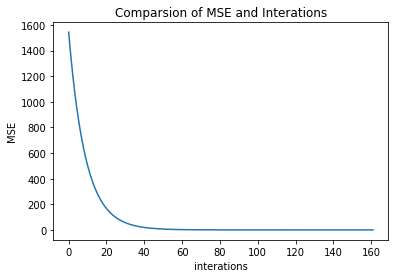

In [2]:
fig1 = plt.plot(loss);
fig1 = plt.xlabel('interations');
fig1 = plt.ylabel('MSE');
fig1 = plt.title('Comparsion of MSE and Interations')

### training parameters

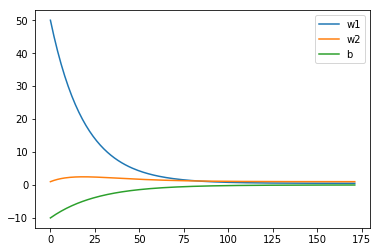

In [46]:
fig2 = plt.plot(w1_history, label='w1')
fig2 = plt.plot(w2_history, label='w2')
fig2 = plt.plot(b_history, label='b')
fig2 = plt.legend()
fig2 = plt.show

## scatter on 3D

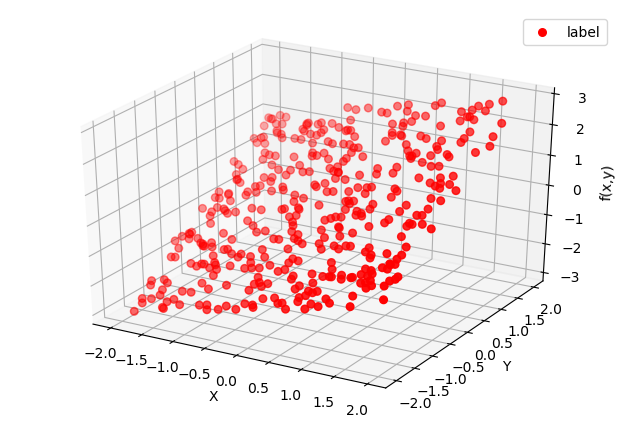

In [19]:
w1 = w1_history[-1]
w2 = w2_history[-1]
W = [[w1],[w2]]
b = b_history[-1]
fig = plt.figure(dpi = 100)
ax = Axes3D(fig)
X = x_train[:,0]
Y = x_train[:,1]
Z = y_train

X = x_train[:,0]
Y = x_train[:,1]
Z1 = np.dot(x_train,W)+b


fig3 = ax.scatter(X, Y, Z, c='r', marker = 'o',s= 30, label='label')  # 绘制数据点
# fig3 = ax.scatter(X, Y, Z1, c='b' , marker = 'x', label='predit')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

fig3 = ax.set_zlabel('f(x,y)')  # 坐标轴
fig3 = ax.set_ylabel('Y')
fig3 = ax.set_xlabel('X')
fig3 = ax.legend()
# fig3 = ax.set_size_inches(50, 50)
plt.show()


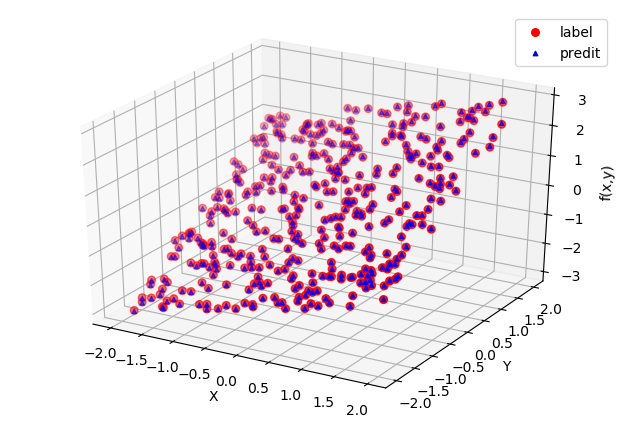

In [16]:
w1 = w1_history[-1]
w2 = w2_history[-1]
W = [[w1],[w2]]
b = b_history[-1]
fig = plt.figure(dpi = 100)
ax = Axes3D(fig)
X = x_train[:,0]
Y = x_train[:,1]
Z = y_train

X = x_train[:,0]
Y = x_train[:,1]
Z1 = np.dot(x_train,W)+b


fig3 = ax.scatter(X, Y, Z, c='r', marker = 'o', s= 30, label='label')  # 绘制数据点
fig3 = ax.scatter(X, Y, Z1, c='b' , marker = '^',s= 10 , label='predit')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

fig3 = ax.set_zlabel('f(x,y)')  # 坐标轴
fig3 = ax.set_ylabel('Y')
fig3 = ax.set_xlabel('X')
fig3 = ax.legend()
# fig3 = ax.set_size_inches(50, 50)
plt.show()


## Validation & Testing

In [21]:
def val(data, label, w1 = w1_history[-1], w2 = w2_history[-1] ,b = b_history[-1]):
    W = [[w1],[w2]]
    output = np.dot(data,W)+b
    error = label - output
    loss = np.sum((error)**2)/(2*len(data)) 
    print("val loss : % .8f%%" % loss)
    
def test(data, label, w1 = w1_history[-1], w2 = w2_history[-1] ,b = b_history[-1]):
    W = [[w1],[w2]]
    output = np.dot(data,W)+b
    error = label - output
    loss = np.sum((error)**2)/(2*len(data)) 
    print("testing loss : % .8f%%" % loss)
val = val(val_train, val_label)
test = test(x_test, y_test)

val loss :  0.00011748%
testing loss :  0.00012429%
